In [1]:
# filter warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import important packges
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import graph_util
import matplotlib.pyplot as plt

# py scripts imports
from input_dataset import read_and_decode, preprocess_input_image
# read_and_decode(tfrecords_files)， preprocess_input_image(img_batch, train=False)

In [2]:
def plot_images(images, labels):
    '''plot one batch size, default: BATCH_SIZE = 25
    '''
    BATCH_SIZE = 25
    for i in np.arange(0, BATCH_SIZE):
        plt.subplot(5, 5, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[i] - 1), fontsize = 14)
        plt.subplots_adjust(top=1.5)
        plt.imshow(images[i].squeeze())
    plt.show()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


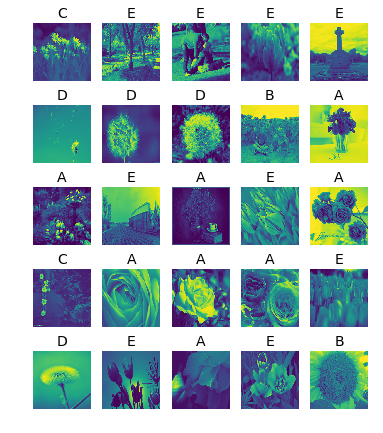

In [3]:
filenames = '../Ele_5_datasets/test/' 

# read image_batch and label_batch from test.tfrecord file using function read_and_decode defined in input_dataset.py
image_batch, label_batch = read_and_decode(filenames)

with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    i = 0 
    try:
        while not coord.should_stop() and i<1:
            # just plot one batch size            
            image, label = sess.run([image_batch, label_batch])
            label = np.argmax(label, axis=1) + 1
            plot_images(image, label)
            i+=1

    except tf.errors.OutOfRangeError:
        print('done!')
    finally:
        coord.request_stop()
    coord.join(threads)